In [ ]:
import os #lets you interact with the operating system. like navigate folders, list files, create paths
import cv2 #cv2 is from OpenCV library. for image processing tasks: loading, resizing, filtering, edge detection
import numpy as np #provides support for arrays and numerical operations. MRI images are stored as numpy arrays of pixel values.
import matplotlib.pyplot as plt #for plotting graphs and images It is used to visualize MRI images, gradients, confusion matrices, etc
import seaborn as sns #Makes plots prettier and easier to read, especially for things like confusion matrices
from sklearn.model_selection import train_test_split #Splits the full dataset into training and testing parts.Essential to evaluate model performance fairly.
from sklearn.preprocessing import LabelEncoder#Converts text labels like 'yes' or 'no' into numerical values (0 and 1).
from sklearn.decomposition import PCA#PCA (Principal Component Analysis) helps to reduce the feature size Keeps important information while removing noise and redundancy
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix #These are used to measure model performance:Accuracy: Overall correctness Confusion matrix: Visualizes predictions vs actual Classification report: Shows precision, recall, F1-score
from sklearn.svm import SVC #SVC stands for Support Vector Classifier.It’s a powerful machine learning model for classification tasks.
import random #random is the built-in Python module to generate random numbers. it’s used to randomly pick images to show as samples

In [ ]:
def load_images(folder_path, img_size=(128, 128)):
    X, y = [], []
    for label in ['yes', 'no']:
        path = os.path.join(folder_path, label)
        for file in os.listdir(path):
            img_path = os.path.join(path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

X_images, y_labels = load_images('./brain_tumor_dataset')
print(f"✅ Loaded {len(X_images)} images. Each image shape: {X_images[0].shape}")

✅ Loaded 253 images. Each image shape: (128, 128)


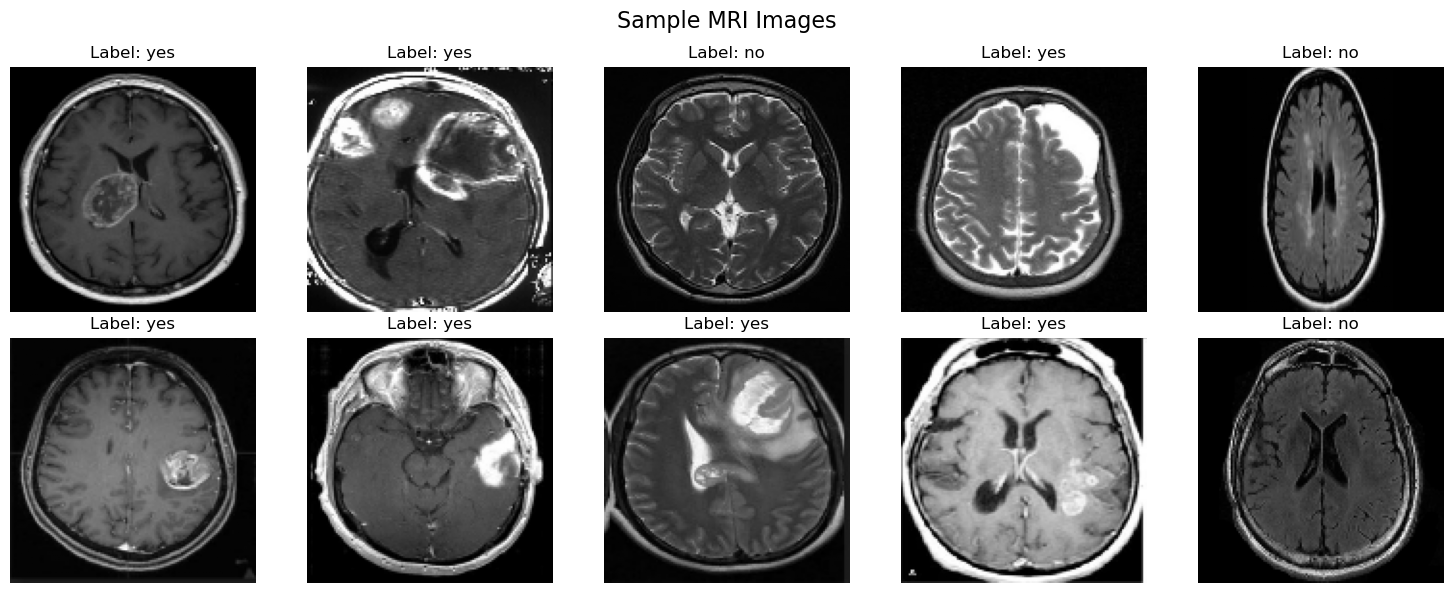

In [3]:
def show_random_images(images, labels, rows=2, cols=5):
    plt.figure(figsize=(15, 6))
    for i in range(1, rows * cols + 1):
        idx = random.randint(0, len(images) - 1)
        plt.subplot(rows, cols, i)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"Label: {labels[idx]}")
        plt.axis('off')
    plt.suptitle("Sample MRI Images", fontsize=16)
    plt.tight_layout()
    plt.show()

show_random_images(X_images, y_labels)

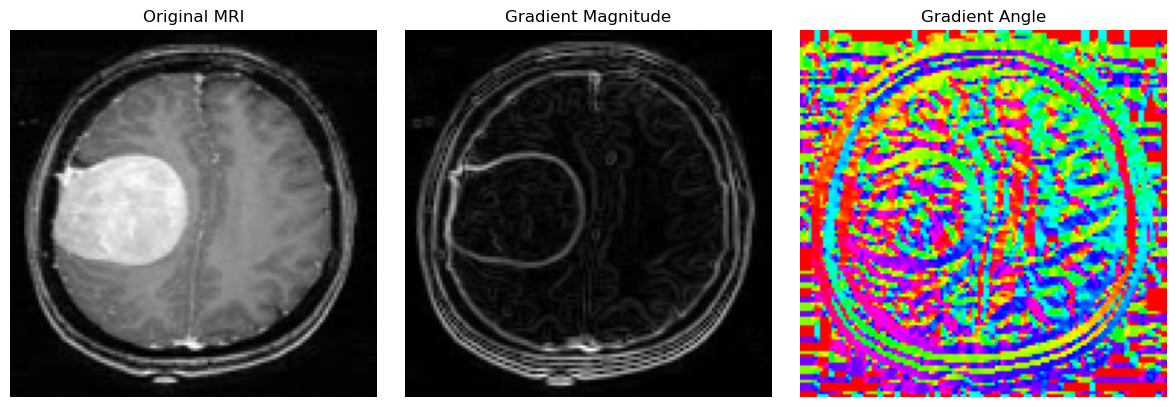

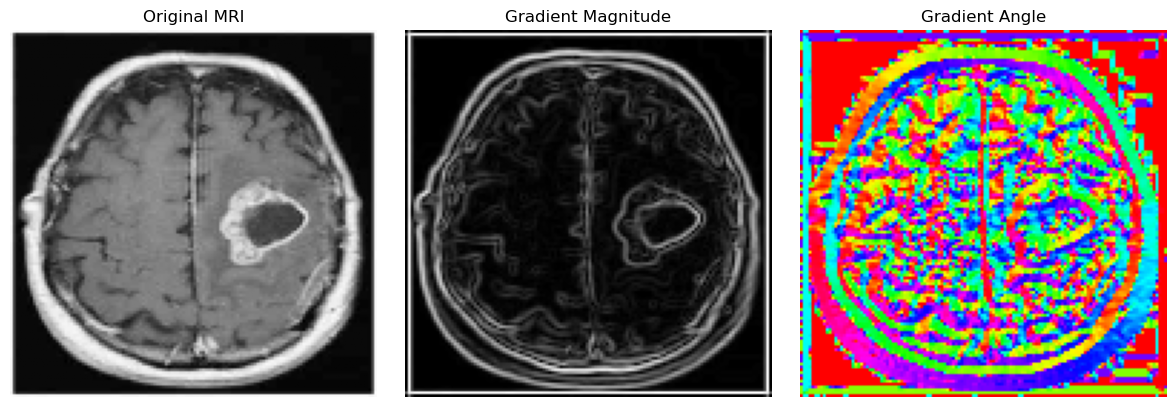

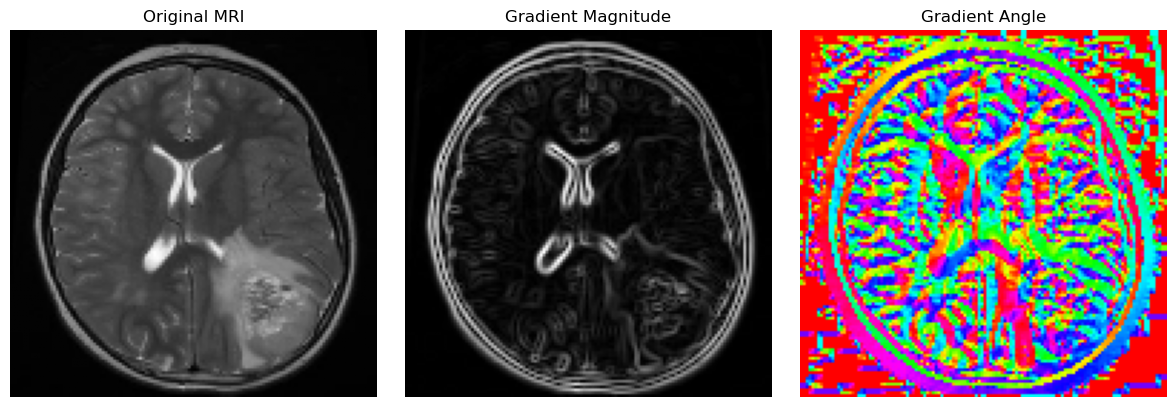

✅ Gradient magnitude + angle features computed. Feature shape: (253, 32768)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def visualize_magnitude_angle_sample(img, magnitude, angle):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title("Original MRI")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Gradient Magnitude")
    plt.imshow(magnitude, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Gradient Angle")
    plt.imshow(angle, cmap='hsv')  # HSV colormap for angles
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def compute_magnitude_angle_features(images, sample_visuals=3):
    features = []
    for i, img in enumerate(images):
        # Compute Sobel gradients
        gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

        # Compute magnitude and angle
        magnitude = cv2.magnitude(gx, gy)
        angle = cv2.phase(gx, gy, angleInDegrees=True)  # angle in degrees for better interpretability

        # Flatten both and concatenate
        combined_feature = np.concatenate((magnitude.flatten(), angle.flatten()))
        features.append(combined_feature)

        # Visualize first few images
        if i < sample_visuals:
            visualize_magnitude_angle_sample(img, magnitude, angle)

    return np.array(features)

# Example usage
X_features = compute_magnitude_angle_features(X_images)
print(f"✅ Gradient magnitude + angle features computed. Feature shape: {X_features.shape}")

In [9]:
from sklearn.model_selection import train_test_split

# Assuming you have corresponding labels in y_labels
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

print(f"✅ Data split done!")
print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, Testing labels shape: {y_test.shape}")


✅ Data split done!
Training set shape: (202, 32768), Training labels shape: (202,)
Testing set shape: (51, 32768), Testing labels shape: (51,)


In [10]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=0.95)  # retain 95% variance

# Fit PCA only on training data
pca.fit(X_train)

# Transform both train and test data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"✅ PCA applied.")
print(f"Original feature shape: {X_train.shape[1]}")
print(f"Reduced feature shape after PCA: {X_train_pca.shape[1]}")


✅ PCA applied.
Original feature shape: 32768
Reduced feature shape after PCA: 151



✅ SVM (Linear) Metrics:
Accuracy:  90.20%
Precision: 0.91
Recall:    0.94
F1-Score:  0.92
Classification Report:
              precision    recall  f1-score   support

          no       0.89      0.85      0.87        20
         yes       0.91      0.94      0.92        31

    accuracy                           0.90        51
   macro avg       0.90      0.89      0.90        51
weighted avg       0.90      0.90      0.90        51



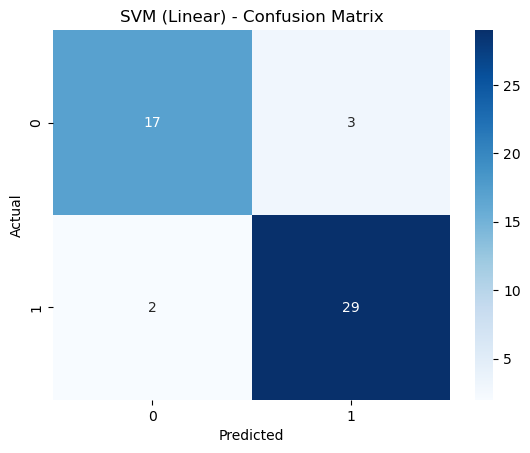


✅ SVM (RBF) Metrics:
Accuracy:  88.24%
Precision: 0.88
Recall:    0.94
F1-Score:  0.91
Classification Report:
              precision    recall  f1-score   support

          no       0.89      0.80      0.84        20
         yes       0.88      0.94      0.91        31

    accuracy                           0.88        51
   macro avg       0.88      0.87      0.87        51
weighted avg       0.88      0.88      0.88        51



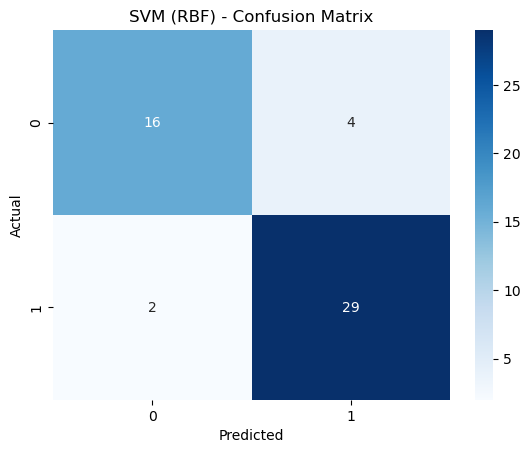


✅ Random Forest Metrics:
Accuracy:  90.20%
Precision: 0.88
Recall:    0.97
F1-Score:  0.92
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.80      0.86        20
         yes       0.88      0.97      0.92        31

    accuracy                           0.90        51
   macro avg       0.91      0.88      0.89        51
weighted avg       0.91      0.90      0.90        51



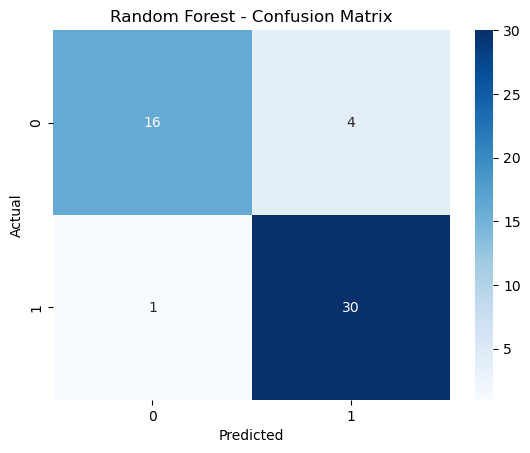


✅ KNN (k=5) Metrics:
Accuracy:  64.71%
Precision: 0.81
Recall:    0.55
F1-Score:  0.65
Classification Report:
              precision    recall  f1-score   support

          no       0.53      0.80      0.64        20
         yes       0.81      0.55      0.65        31

    accuracy                           0.65        51
   macro avg       0.67      0.67      0.65        51
weighted avg       0.70      0.65      0.65        51



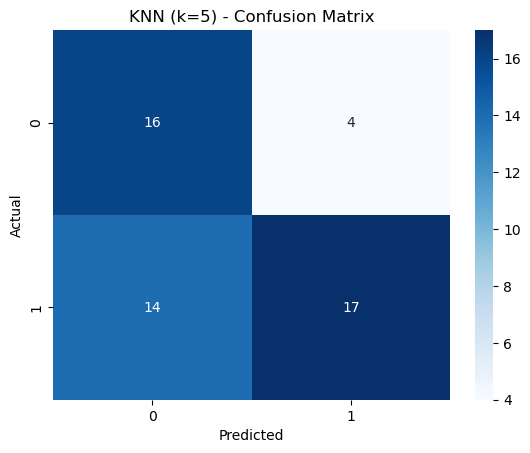


✅ Logistic Regression Metrics:
Accuracy:  90.20%
Precision: 0.91
Recall:    0.94
F1-Score:  0.92
Classification Report:
              precision    recall  f1-score   support

          no       0.89      0.85      0.87        20
         yes       0.91      0.94      0.92        31

    accuracy                           0.90        51
   macro avg       0.90      0.89      0.90        51
weighted avg       0.90      0.90      0.90        51



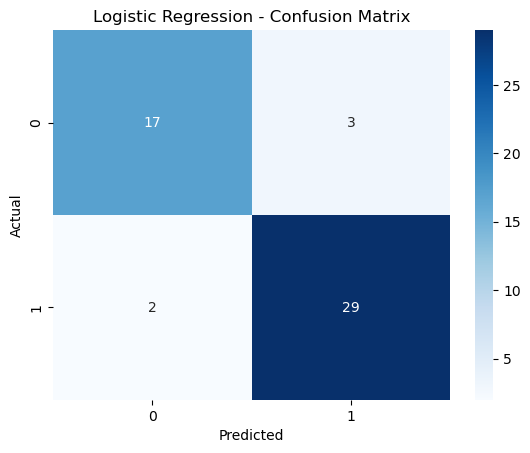


📋 Overall Performance Table:


,Accuracy,Precision,Recall,F1 Score
Model,,,,
SVM (Linear),0.901961,0.906250,0.935484,0.920635
SVM (RBF),0.882353,0.878788,0.935484,0.906250
Random Forest,0.901961,0.882353,0.967742,0.923077
KNN (k=5),0.647059,0.809524,0.548387,0.653846
Logistic Regression,0.901961,0.906250,0.935484,0.920635


C:\Users\lahar\AppData\Local\Temp\ipykernel_14816\85429093.py:73: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lahar\anaconda3\envs\dip\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


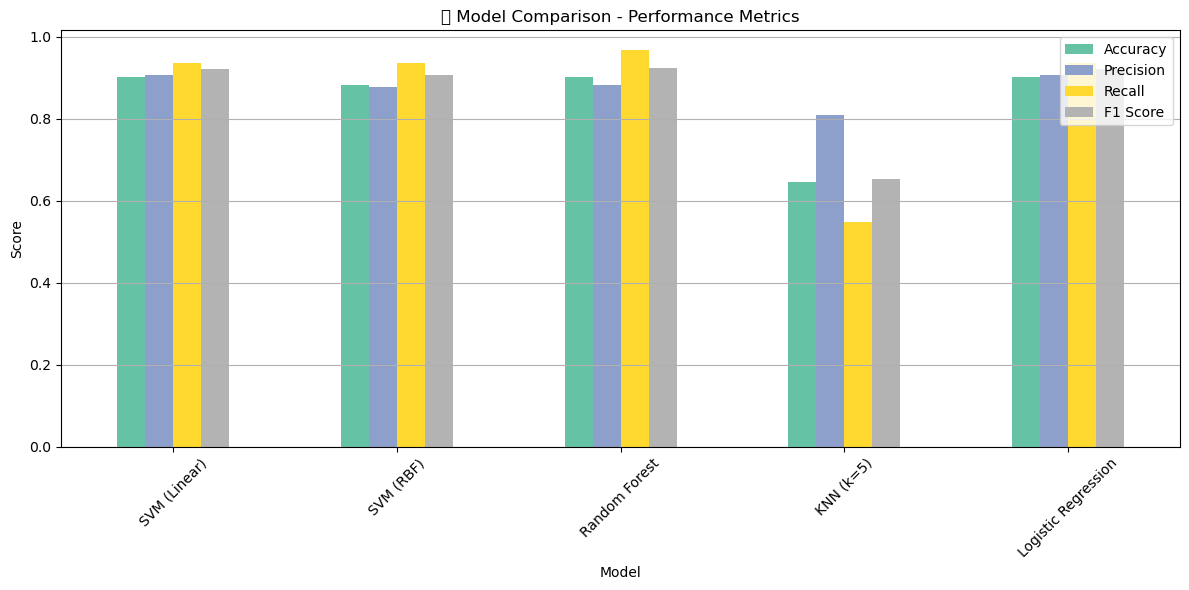


🏆 Best Model: SVM (Linear) with Accuracy: 90.20%


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# To store results
model_scores = []

def evaluate_model(model, name):
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='yes')    # Specify positive label
    rec = recall_score(y_test, y_pred, pos_label='yes')         # Specify positive label
    f1 = f1_score(y_test, y_pred, pos_label='yes')              # Specify positive label

    print(f"\n✅ {name} Metrics:")
    print(f"Accuracy:  {acc * 100:.2f}%")
    print(f"Precision: {prec:.2f}")
    print(f"Recall:    {rec:.2f}")
    print(f"F1-Score:  {f1:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    model_scores.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    return model

# Define all models
models = {
    "SVM (Linear)": SVC(kernel='linear'),
    "SVM (RBF)": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Train and evaluate each model
trained_models = {}
for name, model in models.items():
    trained_models[name] = evaluate_model(model, name)

# Create a performance table
scores_df = pd.DataFrame(model_scores).set_index("Model")
print("\n📋 Overall Performance Table:")
display(scores_df)

# Plot performance comparison
scores_df.plot(kind='bar', figsize=(12, 6), colormap="Set2")
plt.title("🔍 Model Comparison - Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Find the Best Model
best_model_name = scores_df['Accuracy'].idxmax()
best_model_score = scores_df.loc[best_model_name, 'Accuracy']
best_model = trained_models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name} with Accuracy: {best_model_score * 100:.2f}%")



🧠 Prediction by Best Model (SVM (Linear)): Tumor Detected ✅


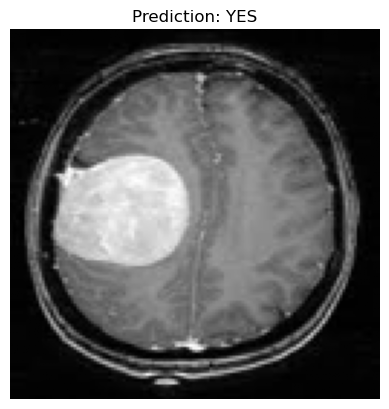


🧠 Prediction by Best Model (SVM (Linear)): No Tumor Detected ❎


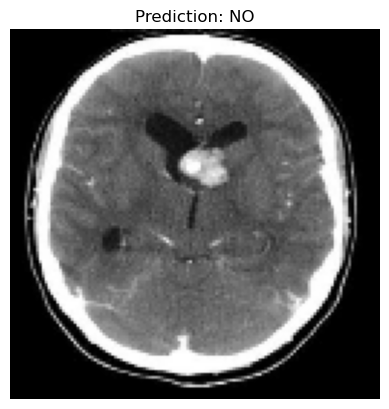

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_best_model(model_scores):
    best_model_name = model_scores['Accuracy'].idxmax()
    return trained_models[best_model_name], best_model_name

def predict_new_image(image_path, trained_models, pca_model, label_encoder, model_scores):
    best_model, best_model_name = get_best_model(model_scores)

    # Load and preprocess the new image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))

    # Compute gradient magnitude and angle
    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    mag = cv2.magnitude(gx, gy)
    angle = cv2.phase(gx, gy, angleInDegrees=True)

    # Flatten both magnitude and angle and concatenate
    mag_flat = mag.flatten()
    angle_flat = angle.flatten()
    feature_vector = np.concatenate((mag_flat, angle_flat)).reshape(1, -1)

    # Apply PCA
    feature_pca = pca_model.transform(feature_vector)

    # Predict
    prediction = best_model.predict(feature_pca)
    predicted_label = prediction[0]  # Directly use prediction result

    # Show result
    print(f"\n🧠 Prediction by Best Model ({best_model_name}): {'Tumor Detected ✅' if predicted_label == 'yes' else 'No Tumor Detected ❎'}")

    plt.imshow(img, cmap='gray')
    plt.title(f"Prediction: {predicted_label.upper()}")
    plt.axis('off')
    plt.show()

# Example usage
predict_new_image('./brain_tumor_dataset/yes/Y1.jpg', trained_models, pca, label_encoder, scores_df)
predict_new_image('./brain_tumor_dataset/no/N1.jpg', trained_models, pca, label_encoder, scores_df)
